# Data Analysis and Data Science
## Putting it all together

By: Caroline Labelle
<br>For: BIM6065-C

<br>
Date: July 7th 2022

<hr style="border:1px solid black"> </hr>


In [ ]:
Name: Caroline Labelle

In [2]:
### Import sklearn
import sklearn.decomposition
import sklearn.cluster

### Import scipy
import scipy

### Import pandas, numpy, seaborn and matplotlib.pyplot
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
sns.set(rc={'figure.figsize':(9, 4)})
sns.set_theme(context="notebook", style="white", palette="Set2")

## Data Analysis II: k-means for clustering datapoints

In [3]:
### Import and clean the penguins dataset
data_penguin = pd.read_csv("palmer_penguins.csv", sep=",", header=0)
data_penguin.dropna(axis="index", inplace=True)
data_penguin = data_penguin.reset_index(drop=True)

In [5]:
### Do dimensionality reduction through PCA
X = data_penguin.iloc[:, 2:6]

# Data scaling
scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X) 

# Initiate the PCA and apply it to the scaled data
pca = sklearn.decomposition.PCA(n_components=4)
pca.fit(X_scaled)

# Apply the dimensionality reduction to our data
X_reduce = pca.fit_transform(X_scaled)

reduce_penguin = pd.DataFrame(X_reduce)
reduce_penguin["species"] = data_penguin.species
reduce_penguin["island"] = data_penguin.island
reduce_penguin["sex"] = data_penguin.sex

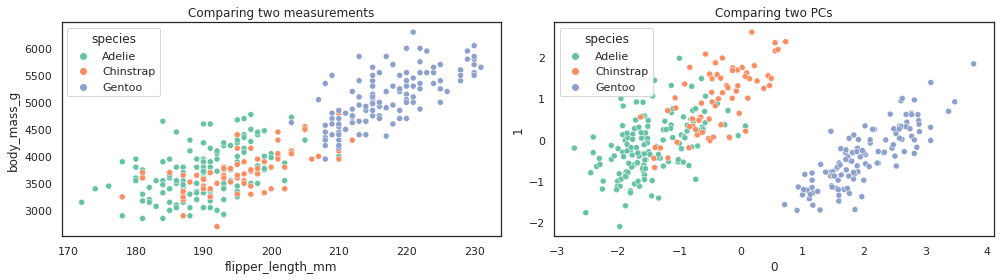

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(14, 4))

sns.scatterplot(data=data_penguin, x="flipper_length_mm", y="body_mass_g", hue="species", ax=ax[0])
ax[0].set_title("Comparing two measurements")

sns.scatterplot(data=reduce_penguin, x=0, y=1, hue="species", ax=ax[1])
ax[1].set_title("Comparing two PCs")

plt.tight_layout()
plt.show()

We wish to group similar samples and compare the groups to catagorical labels.

### k-means with scikit-learn

The KMeans algorithm clusters data by trying to separate samples in $n$ groups of equal variance, minimizing a criterion known as **within-cluster sum-of-squares**.

This algorithm requires the number of clusters to be specified. It scales well to large number of samples and has been used across a large range of application areas in many different fields.

At a glance, the k-means algorithm divides a set of $N$ samples $X$ into $K$ disjoint clusters $C$, each described by the mean $\mu_{j}$ of the samples in the cluster $C_{j}$. 

*In very high-dimensional spaces, Euclidean distances tend to become inflated (this is an instance of the so-called “curse of dimensionality”). Running a dimensionality reduction algorithm such as Principal component analysis (PCA) prior to k-means clustering can alleviate this problem and speed up the computations.*

Ressource: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans

Let's apply the k-means algorithm to the first two principal component of the Iris dataset. **Are we able to cluster pengouins based on the species?

In [54]:
P=data_penguin.iloc[:,2:6]
P.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,36.7,19.3,193.0,3450.0
4,39.3,20.6,190.0,3650.0


In [44]:
### Define the data
P = data_penguin.loc[:,["flipper_length_mm","body_mass_g"]]
P.head()

,flipper_length_mm,body_mass_g
0,181.0,3750.0
1,186.0,3800.0
2,195.0,3250.0
3,193.0,3450.0
4,190.0,3650.0


In [55]:
### Initiate the k-means alogirthm
### How many cluster should we use?
K = 3
kmean = sklearn.cluster.KMeans(n_clusters=K)
kmean

KMeans(n_clusters=3)

In [56]:
### Apply kmeans to our data
kmeans_P = kmean.fit(P)

**Attributes of the kmeans object:**

<code>kmeans.cluster_centers_</code>: coordinates of cluster centers

<code>kmeans.labels_</code>: labels of each point

In [57]:
### Get centroids coordinate
kmeans_P.cluster_centers_

array([[  44.87254902,   16.90882353,  204.65686275, 4445.34313725],
       [  41.2863354 ,   18.03726708,  190.08695652, 3522.04968944],
       [  48.93571429,   15.53142857,  220.61428571, 5435.35714286]])

In [58]:
### Get centroids coordinate
kmeans_P.cluster_centers_

array([[  44.87254902,   16.90882353,  204.65686275, 4445.34313725],
       [  41.2863354 ,   18.03726708,  190.08695652, 3522.04968944],
       [  48.93571429,   15.53142857,  220.61428571, 5435.35714286]])

In [18]:
len(P)

333

In [59]:
### Get datapoints labels
kmeans_P.labels_

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 2, 0, 2, 2, 0,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 2, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,

In [42]:
### Add the cluster column
data_penguin.loc[:,"cluster"]=kmeans_P.labels_

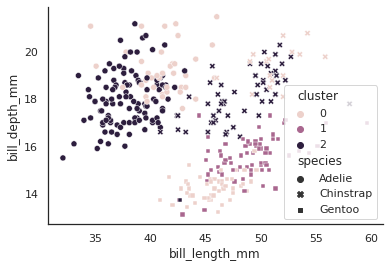

In [51]:
### Plot the cluster and the labels
sns.scatterplot(data=data_penguin, x="bill_length_mm", y="bill_depth_mm", hue="cluster", style="species")
sns.despine()

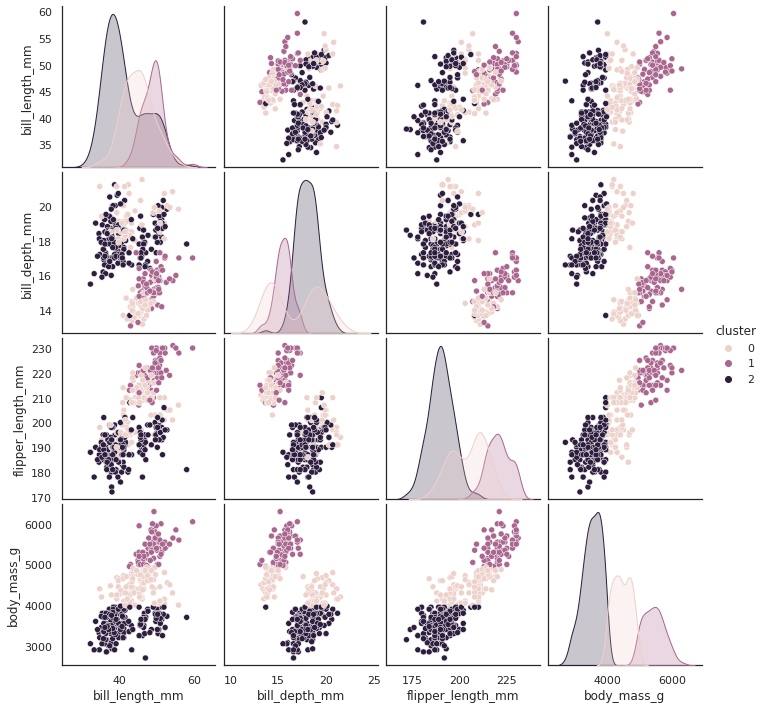

In [52]:
sns.pairplot(data=data_penguin, hue="cluster")

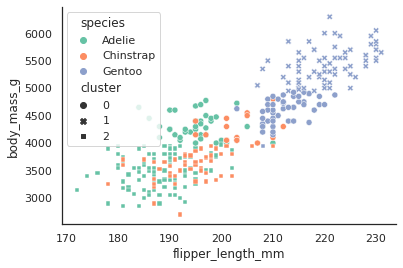

In [50]:
sns.scatterplot(data=data_penguin, x="flipper_length_mm", y="body_mass_g", hue="species", style="cluster")
sns.despine()

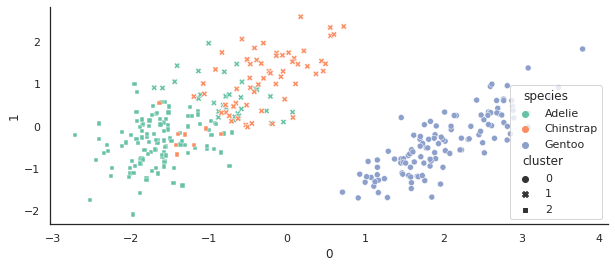

In [34]:
### Instead of using measurements values, cluster penguins based on the result of the dimensionality reduction


It is not always easy to define the number of cluster to use!

The most common approach for deciding the value of $K$ is the so-called elbow method. It involves running the algorithm multiple times over a loop, with an increasing number of cluster choice and then plotting a clustering score as a function of the number of clusters.

<code>inertia_</code>: sum of squared distances of samples to their closest cluster center

In [60]:
### Get the inertia of our initial kmean
kmeans_P.inertia_

28336434.865731094

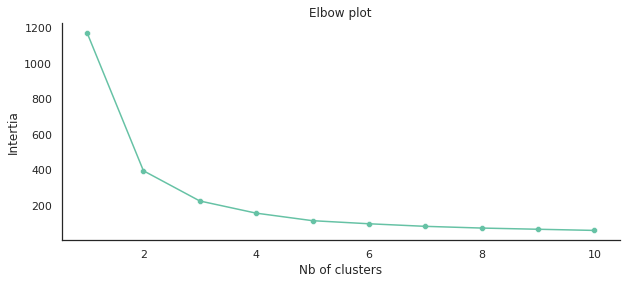

In [61]:
### Run kmeans for various k values
### initiate empty list
inertia_list = []

X = reduce_penguin.iloc[:, 0:2]

### Create for loop for K from 1 to 10
for k in range(1, 11) :
    kmean = sklearn.cluster.KMeans(n_clusters=k)
    kmeans_X = kmean.fit(X)
    
    ## Add the inertia to the list
    inertia_list += [kmeans_X.inertia_]
    
### Plot K vs. intertia
plt.figure(figsize=(10, 4))
sns.lineplot(x=np.arange(1, 11), y=inertia_list)
sns.scatterplot(x=np.arange(1, 11), y=inertia_list)

plt.title("Elbow plot")
plt.xlabel("Nb of clusters")
plt.ylabel("Intertia")

sns.despine()

## Data Analysis III: Putting it all together!

You are given a dataset of gene experissions for $N$ samples. Each sample represent a breast cancer patient. 
The dataset comprises two TSV files:
* `patient_expression.tsv`: contains the expressions of $M$ genes for each of the `N` patients;
* `patient_subtype.tsx`: contains the clinical classification of each patient;

The order is the same for all files.

You wonder if you can cluster patient, from their expression profil, by clinical classification.
** The expression values are already log-transformed

### Create a dataframe of the data

In [4]:
fn = "breast_cancer_expression.tsv"
fn1 = "breast_cancer_subtype.tsv"

dataframe = pd.read_csv(fn, sep="\t", header=0)
dataframe

,ENSG00000011426.9,ENSG00000054598.6,ENSG00000062038.12,ENSG00000077152.8,ENSG00000082175.13,ENSG00000089685.13,ENSG00000091831.20,ENSG00000092621.10,ENSG00000094804.8,ENSG00000099953.8,...,ENSG00000171791.11,ENSG00000171848.12,ENSG00000173890.15,ENSG00000174371.15,ENSG00000175063.15,ENSG00000176890.14,ENSG00000186081.10,ENSG00000186847.5,ENSG00000186868.14,ENSG00000261857.5
0,1.326515,3.475678,2.374959,3.409941,0.014148,3.235387,0.094595,4.488874,2.023978,3.996567,...,0.415417,3.163366,1.751804,1.727270,4.541346,3.437507,5.678637,7.451924,0.598057,2.860720
1,1.885133,2.752910,3.770004,3.822052,0.051402,3.001023,0.241303,3.680198,1.820556,1.344271,...,2.035764,2.339897,0.949565,1.967062,4.167635,3.288760,5.370061,2.870596,0.102755,3.075090
2,3.246316,4.423018,3.700385,4.369893,0.155187,3.752491,0.102125,3.779098,2.218593,1.927426,...,1.123048,3.647681,1.063245,2.876544,4.498677,2.722251,3.125330,1.928449,0.374845,2.531836
3,2.161512,2.314358,3.562899,3.786747,0.039245,4.227823,0.493791,4.124650,2.202475,2.317170,...,0.930984,3.071066,0.577870,2.554480,4.879861,3.597988,5.953152,3.761062,0.528845,1.604472
4,2.795468,1.876752,0.658127,2.581386,0.014486,2.688765,0.432283,2.655957,1.872897,0.924654,...,1.975961,2.893713,0.272402,2.119050,3.571224,2.554718,0.189085,0.000000,0.199501,0.041927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,0.820838,2.418684,3.460263,1.714065,2.574779,1.158088,2.099645,2.689138,0.705885,3.340791,...,2.522965,1.112896,2.147804,0.498596,1.633678,1.791459,5.193883,5.470001,2.507121,2.424799
641,1.666605,1.818016,2.965531,3.398361,1.131149,2.243665,2.103245,3.090764,1.380203,4.770786,...,1.989089,2.517961,1.820856,1.147327,3.336830,2.926771,4.834529,5.614588,1.520555,2.128657
642,0.810583,2.097097,3.595351,1.667315,0.563232,1.041924,1.894974,1.950360,1.017512,3.408128,...,1.953431,1.019320,1.837105,0.575619,1.638372,1.749170,5.413128,5.591127,2.129137,1.244375
643,1.153391,0.935530,2.415240,2.179527,0.183943,1.688365,0.297845,2.814779,0.754930,4.585375,...,0.820314,2.377948,2.120787,0.626063,2.161975,1.224772,3.553468,3.305371,1.386436,0.515823


In [5]:
dataframe1 = pd.read_csv(fn1, sep="\t", header=None)
dataframe1

,0
0,Basal
1,Basal
2,Basal
3,Basal
4,Basal
...,...
640,Normal
641,Normal
642,Normal
643,Normal


In [10]:
dataframe["Subtype"]=pd.read_csv(fn1, sep="\t", header=None)
dataframe

,ENSG00000011426.9,ENSG00000054598.6,ENSG00000062038.12,ENSG00000077152.8,ENSG00000082175.13,ENSG00000089685.13,ENSG00000091831.20,ENSG00000092621.10,ENSG00000094804.8,ENSG00000099953.8,...,ENSG00000171848.12,ENSG00000173890.15,ENSG00000174371.15,ENSG00000175063.15,ENSG00000176890.14,ENSG00000186081.10,ENSG00000186847.5,ENSG00000186868.14,ENSG00000261857.5,Subtype
0,1.326515,3.475678,2.374959,3.409941,0.014148,3.235387,0.094595,4.488874,2.023978,3.996567,...,3.163366,1.751804,1.727270,4.541346,3.437507,5.678637,7.451924,0.598057,2.860720,Basal
1,1.885133,2.752910,3.770004,3.822052,0.051402,3.001023,0.241303,3.680198,1.820556,1.344271,...,2.339897,0.949565,1.967062,4.167635,3.288760,5.370061,2.870596,0.102755,3.075090,Basal
2,3.246316,4.423018,3.700385,4.369893,0.155187,3.752491,0.102125,3.779098,2.218593,1.927426,...,3.647681,1.063245,2.876544,4.498677,2.722251,3.125330,1.928449,0.374845,2.531836,Basal
3,2.161512,2.314358,3.562899,3.786747,0.039245,4.227823,0.493791,4.124650,2.202475,2.317170,...,3.071066,0.577870,2.554480,4.879861,3.597988,5.953152,3.761062,0.528845,1.604472,Basal
4,2.795468,1.876752,0.658127,2.581386,0.014486,2.688765,0.432283,2.655957,1.872897,0.924654,...,2.893713,0.272402,2.119050,3.571224,2.554718,0.189085,0.000000,0.199501,0.041927,Basal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,0.820838,2.418684,3.460263,1.714065,2.574779,1.158088,2.099645,2.689138,0.705885,3.340791,...,1.112896,2.147804,0.498596,1.633678,1.791459,5.193883,5.470001,2.507121,2.424799,Normal
641,1.666605,1.818016,2.965531,3.398361,1.131149,2.243665,2.103245,3.090764,1.380203,4.770786,...,2.517961,1.820856,1.147327,3.336830,2.926771,4.834529,5.614588,1.520555,2.128657,Normal
642,0.810583,2.097097,3.595351,1.667315,0.563232,1.041924,1.894974,1.950360,1.017512,3.408128,...,1.019320,1.837105,0.575619,1.638372,1.749170,5.413128,5.591127,2.129137,1.244375,Normal
643,1.153391,0.935530,2.415240,2.179527,0.183943,1.688365,0.297845,2.814779,0.754930,4.585375,...,2.377948,2.120787,0.626063,2.161975,1.224772,3.553468,3.305371,1.386436,0.515823,Normal


### Explore the data [35 points]

<hr>

#### Part 1 [15 points]
Answer the following questions:
1. How many patients are you considering?
2. How many genes are you considering?
3. Is there a pair of genes that seems to be linearly correlated? If yes, which genes and what is the correlation coefficient?

In [89]:
dataframe.shape

(645, 48)

In [ ]:
## We are considering 645 genes and 47 genes (the last column is the subtype column)

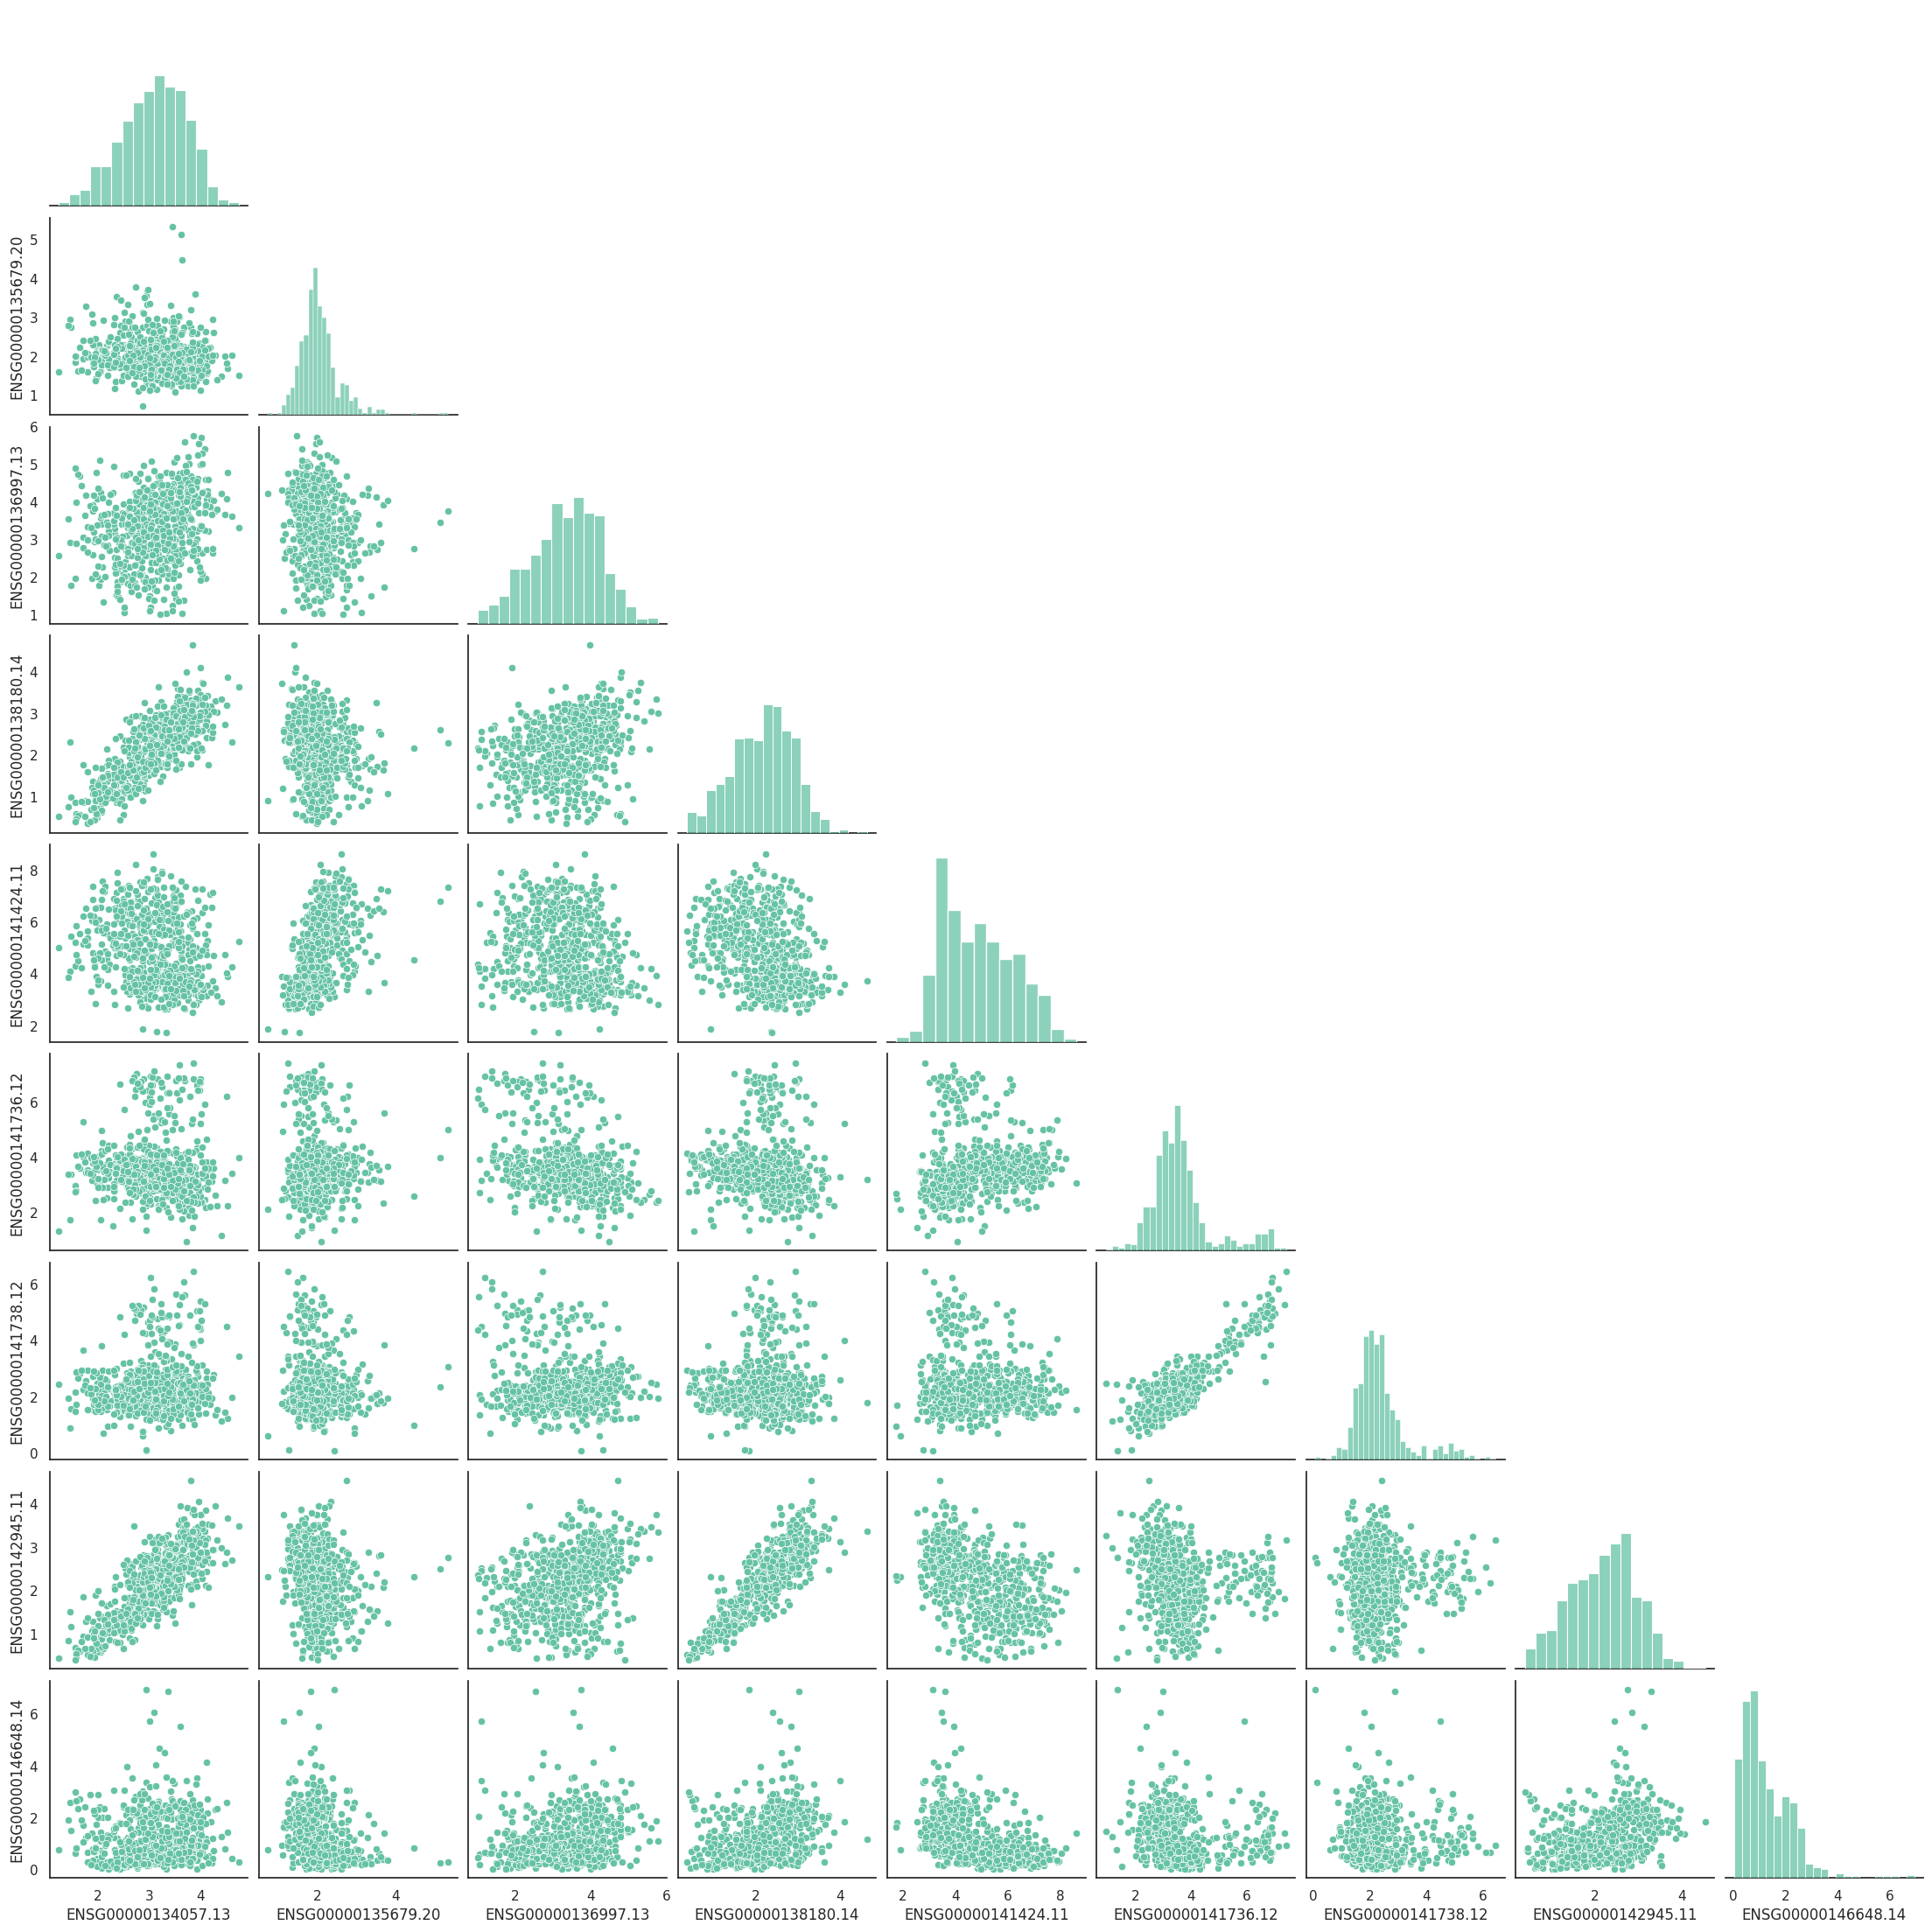

In [8]:
sns.pairplot(data=dataframe.iloc[:,21:30], corner=True)

In [12]:
dataframe["ENSG00000138180.14"].corr(dataframe["ENSG00000142945.11"])

0.8626210377362719

In [13]:
dataframe["ENSG00000141738.12"].corr(dataframe["ENSG00000141736.12"])

0.8670276685363959

In [14]:
dataframe["ENSG00000142945.11"].corr(dataframe["ENSG00000138180.14"])

0.862621037736272

<hr>

#### Part 2 [20 points]
Visually inspect your dataset by generating at least two (2) graphs. For each visualisation you should:
* State what you are exploring;
* Plot comprehensive graphs (title, axis-labels, legend if necesssary);
* Give a consise interpretation of the results.

In [7]:
sns.scatterplot(data=dataframe, x="Subtype"

SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (1489652678.py, line 1)

<hr style="border:1px solid black"> </hr>

### Analyse the data [60 points]

You are wondering if it would be possible to group patients in various subsets. 

<hr>

#### Part 1 [20 points]

Using the methods presented in previous class, are you able to group patients in various subsets?

Make sure that each step of your analysis is clearly identifiable. When you make decision regarding algorithm parameters, make sure to justify them with a short sentence and a plot (if applicable).

For each results generated, give a concise interpretation.

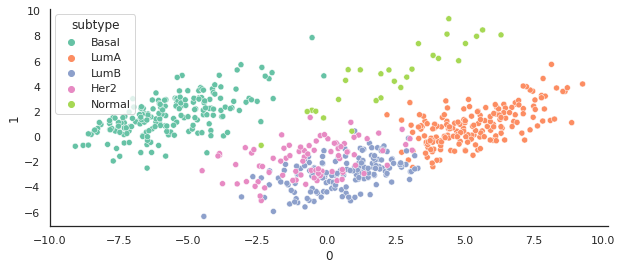

Are you able to link each found cluster to a cancer subtype?

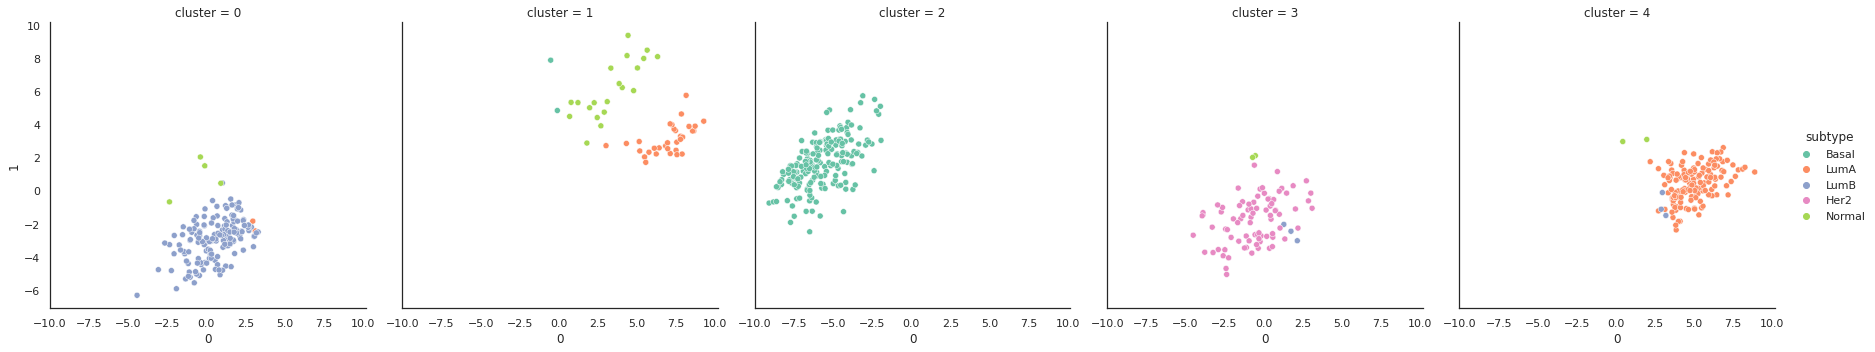

<hr>

#### Part 2

Go back the pair(s) of genes with high linear correlation. Do their expressions differ from one to subtype to another? If so, how?

<hr>

#### BONUS

For each cancer subtype, identify the most expressed gene (on average). Do you find a different gene for each cluster?

If you do a rapid literrature search, are there identified genes known to be link to their respective subtype?

<hr style="border:1px solid black"> </hr>

## Share your work

You are almost done!!

Once you are done with the exercices and are happy with your results, **push your Notebook to your GitHub account**.

Make sure that you've saved you Notebook before your final commit and push!

You last commit/push needs to be dated before **July 16th, 1:00 PM**.

Finally, **submit the URL to your GitHub account (https://github.com/HANDLE) to StudiUM.**

<hr style="border:1px solid black"> </hr>

# Good Job!

Yeah! You've just finish the last assignment for the Data Science & Data Analysis bloc of BIM6065: Congratulations 🎉

You guys did an amazing job over the last two weeks: you should be proud of yourselves!

I wish you the very best in your Master!